#**P NIKHIL KRISHNA**
#**HU21CSEN0300328**
#**SAINT KITTS AND NEVIS**

#**LINKS**
#**https://en.wikipedia.org/wiki/Saint_Kitts_and_Nevis**
#**https://en.wikipedia.org/wiki/Saint_Kitts_and_Nevis_at_the_Olympics**
#**https://en.wikipedia.org/wiki/Saint_Kitts_and_Nevis_Olympic_Committee**

In [ ]:
import requests
from bs4 import BeautifulSoup
import urllib
import re

#Web Scrapping

In [ ]:
source = urllib.request.urlopen("https://en.wikipedia.org/wiki/Saint_Kitts_and_Nevis")

In [ ]:
Soup = BeautifulSoup(source,"lxml")

In [ ]:
TEXT = ""
for paragraph in Soup.find_all("p"):
  TEXT += paragraph.text

In [ ]:
print(TEXT)


Saint Kitts and Nevis (/-ˈkɪts ... ˈniːvɪs/ ⓘ), officially the Federation of Saint Christopher and Nevis,[7] is an island country and microstate consisting of the two islands of Saint Kitts and Nevis, both located in the West Indies, in the Leeward Islands chain of the Lesser Antilles. With 261 square kilometres (101 sq mi) of territory, and roughly 50,000 inhabitants, it is the smallest sovereign state in the Western Hemisphere, in both area and population, as well as the world's smallest sovereign federation.[1] The country is a Commonwealth realm, with Charles III as King and head of state.[1][8] It is the smallest sovereign state in North America.
The capital city is Basseterre, located on the larger island of Saint Kitts.[1] Basseterre is also the main port for passenger entry (via cruise ships) and cargo. The smaller island of Nevis lies approximately 3 km (2 mi) to the southeast of Saint Kitts, across a shallow channel called The Narrows.[1]
The British dependency of Anguilla w

In [ ]:
len(TEXT.split())

3934

#Since the data contains less than 5000 words, Adding more Data of Saint Kitts and Nevis of Olympics from the wikipedia page

In [ ]:
source1 = urllib.request.urlopen("https://en.wikipedia.org/wiki/Saint_Kitts_and_Nevis_at_the_Olympics")
Soup = BeautifulSoup(source1,"lxml")

In [ ]:
for paragraph in Soup.find_all("p"):
  TEXT += paragraph.text

In [ ]:
len(TEXT.split())

4680

In [ ]:
source2 = urllib.request.urlopen("https://en.wikipedia.org/wiki/Saint_Kitts_and_Nevis_Olympic_Committee")
Soup = BeautifulSoup(source2,"lxml")

In [ ]:
for paragraph in Soup.find_all("p"):
  TEXT += paragraph.text

In [ ]:
len(TEXT.split())

5374

#Now the data contains more than 5000 words

#Preprocessing the text using regular expressions

In [ ]:
#Remove references like [1][2]
TEXT = re.sub(r'\[\d+\]', '', TEXT)

#Remove special characters like ?, %, and $
TEXT = re.sub(r'[?%$]', '', TEXT)

#Remove non-English terms
TEXT = re.sub(r'[^\x00-\x7F]+', '', TEXT)

In [ ]:
TEXT

'\nSaint Kitts and Nevis (/-kts...nivs/ ), officially the Federation of Saint Christopher and Nevis, is an island country and microstate consisting of the two islands of Saint Kitts and Nevis, both located in the West Indies, in the Leeward Islands chain of the Lesser Antilles. With 261 square kilometres (101sqmi) of territory, and roughly 50,000 inhabitants, it is the smallest sovereign state in the Western Hemisphere, in both area and population, as well as the world\'s smallest sovereign federation. The country is a Commonwealth realm, with Charles III as King and head of state. It is the smallest sovereign state in North America.\nThe capital city is Basseterre, located on the larger island of Saint Kitts. Basseterre is also the main port for passenger entry (via cruise ships) and cargo. The smaller island of Nevis lies approximately 3km (2mi) to the southeast of Saint Kitts, across a shallow channel called The Narrows.\nThe British dependency of Anguilla was historically also a pa

In [ ]:
len(TEXT.split())

5326

#CBOW WITH LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts([TEXT])
len(tokenizer.word_index)

1599

In [ ]:
input_sequences = []
for sentence in TEXT.split('\n'):
  tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]

  for i in range(1,len(tokenized_sentence)):
    input_sequences.append(tokenized_sentence[:i+1])

In [ ]:
print(input_sequences[:50])

[[9, 6], [9, 6, 2], [9, 6, 2, 7], [9, 6, 2, 7, 611], [9, 6, 2, 7, 611, 612], [9, 6, 2, 7, 611, 612, 228], [9, 6, 2, 7, 611, 612, 228, 1], [9, 6, 2, 7, 611, 612, 228, 1, 73], [9, 6, 2, 7, 611, 612, 228, 1, 73, 3], [9, 6, 2, 7, 611, 612, 228, 1, 73, 3, 9], [9, 6, 2, 7, 611, 612, 228, 1, 73, 3, 9, 74], [9, 6, 2, 7, 611, 612, 228, 1, 73, 3, 9, 74, 2], [9, 6, 2, 7, 611, 612, 228, 1, 73, 3, 9, 74, 2, 7], [9, 6, 2, 7, 611, 612, 228, 1, 73, 3, 9, 74, 2, 7, 10], [9, 6, 2, 7, 611, 612, 228, 1, 73, 3, 9, 74, 2, 7, 10, 45], [9, 6, 2, 7, 611, 612, 228, 1, 73, 3, 9, 74, 2, 7, 10, 45, 23], [9, 6, 2, 7, 611, 612, 228, 1, 73, 3, 9, 74, 2, 7, 10, 45, 23, 36], [9, 6, 2, 7, 611, 612, 228, 1, 73, 3, 9, 74, 2, 7, 10, 45, 23, 36, 2], [9, 6, 2, 7, 611, 612, 228, 1, 73, 3, 9, 74, 2, 7, 10, 45, 23, 36, 2, 613], [9, 6, 2, 7, 611, 612, 228, 1, 73, 3, 9, 74, 2, 7, 10, 45, 23, 36, 2, 613, 614], [9, 6, 2, 7, 611, 612, 228, 1, 73, 3, 9, 74, 2, 7, 10, 45, 23, 36, 2, 613, 614, 3], [9, 6, 2, 7, 611, 612, 228, 1, 73, 3, 

In [ ]:
max_len = max([len(x) for x in input_sequences])

In [ ]:
print(max_len)

191


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequences = pad_sequences(input_sequences, maxlen = max_len, padding='pre')

In [ ]:
print(padded_input_sequences)

[[   0    0    0 ...    0    9    6]
 [   0    0    0 ...    9    6    2]
 [   0    0    0 ...    6    2    7]
 ...
 [   0    0    0 ...    0    1 1598]
 [   0    0    0 ...    1 1598 1599]
 [   0    0    0 ... 1598 1599  326]]


In [ ]:
X = padded_input_sequences[:,:-1]
y = padded_input_sequences[:,-1]

In [ ]:
print(X.shape)
print(y.shape)

(5390, 190)
(5390,)


In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,num_classes=1600)

In [ ]:
print(y.shape)

(5390, 1600)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
model = Sequential()
model.add(Embedding(1600, 100, input_length=max_len-1))
model.add(LSTM(150))
#model.add(LSTM(150))
model.add(Dense(1600, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 190, 100)          160000    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 1600)              241600    
                                                                 
Total params: 552200 (2.11 MB)
Trainable params: 552200 (2.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X,y,epochs=75)

Epoch 1/75
169/169 [==============================] - 36s 199ms/step - loss: 6.5434 - accuracy: 0.0811
Epoch 2/75
169/169 [==============================] - 34s 199ms/step - loss: 6.0143 - accuracy: 0.0909
Epoch 3/75
169/169 [==============================] - 34s 202ms/step - loss: 5.7680 - accuracy: 0.1386
Epoch 4/75
169/169 [==============================] - 34s 202ms/step - loss: 5.4981 - accuracy: 0.1547
Epoch 5/75
169/169 [==============================] - 33s 197ms/step - loss: 5.2136 - accuracy: 0.1679
Epoch 6/75
169/169 [==============================] - 34s 199ms/step - loss: 4.9347 - accuracy: 0.1852
Epoch 7/75
169/169 [==============================] - 34s 202ms/step - loss: 4.6481 - accuracy: 0.2015
Epoch 8/75
169/169 [==============================] - 34s 200ms/step - loss: 4.3768 - accuracy: 0.2228
Epoch 9/75
169/169 [==============================] - 34s 201ms/step - loss: 4.1100 - accuracy: 0.2416
Epoch 10/75
169/169 [==============================] - 34s 201ms/step - l

In [ ]:
import time
import numpy as np
text = "The country consists"

for i in range(15):
  # tokenize
  token_text = tokenizer.texts_to_sequences([text])[0]
  # padding
  padded_token_text = pad_sequences([token_text], maxlen=max_len-1, padding='pre')
  # predict
  pos = np.argmax(model.predict(padded_token_text))

  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(2)

1/1 [==============================] - 0s 316ms/step
The country consists of
1/1 [==============================] - 0s 22ms/step
The country consists of two
1/1 [==============================] - 0s 27ms/step
The country consists of two main
1/1 [==============================] - 0s 22ms/step
The country consists of two main islands
1/1 [==============================] - 0s 23ms/step
The country consists of two main islands saint
1/1 [==============================] - 0s 26ms/step
The country consists of two main islands saint kitts
1/1 [==============================] - 0s 33ms/step
The country consists of two main islands saint kitts and
1/1 [==============================] - 0s 24ms/step
The country consists of two main islands saint kitts and nevis
1/1 [==============================] - 0s 30ms/step
The country consists of two main islands saint kitts and nevis separated
1/1 [==============================] - 0s 22ms/step
The country consists of two main islands saint kitts and nev

In [ ]:
print(TEXT)


Saint Kitts and Nevis (/-kts...nivs/ ), officially the Federation of Saint Christopher and Nevis, is an island country and microstate consisting of the two islands of Saint Kitts and Nevis, both located in the West Indies, in the Leeward Islands chain of the Lesser Antilles. With 261 square kilometres (101sqmi) of territory, and roughly 50,000 inhabitants, it is the smallest sovereign state in the Western Hemisphere, in both area and population, as well as the world's smallest sovereign federation. The country is a Commonwealth realm, with Charles III as King and head of state. It is the smallest sovereign state in North America.
The capital city is Basseterre, located on the larger island of Saint Kitts. Basseterre is also the main port for passenger entry (via cruise ships) and cargo. The smaller island of Nevis lies approximately 3km (2mi) to the southeast of Saint Kitts, across a shallow channel called The Narrows.
The British dependency of Anguilla was historically also a part of

In [ ]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'of': 3, 'in': 4, 'to': 5, 'kitts': 6, 'nevis': 7, 'a': 8, 'saint': 9, 'is': 10, 'was': 11, 'by': 12, 'st': 13, 'with': 14, 'at': 15, 'as': 16, 'on': 17, 'for': 18, 'games': 19, 'has': 20, 'from': 21, 'it': 22, 'island': 23, 'both': 24, 'first': 25, 'not': 26, 'olympic': 27, 'collins': 28, '100': 29, 'islands': 30, 'citation': 31, 'needed': 32, 'one': 33, 'time': 34, 'team': 35, 'country': 36, 'commonwealth': 37, 'which': 38, 'were': 39, 'that': 40, 'meter': 41, 'two': 42, 'also': 43, 'olympics': 44, 'an': 45, 'caribbean': 46, 'french': 47, 'he': 48, 'state': 49, 'are': 50, 'national': 51, 'other': 52, 'summer': 53, 'did': 54, 'seconds': 55, 'population': 56, 'anguilla': 57, 'century': 58, 'english': 59, 'they': 60, 'its': 61, 'relay': 62, 'citizenship': 63, 'british': 64, 'who': 65, 'but': 66, 'or': 67, 'sent': 68, 'general': 69, 'kim': 70, 'athlete': 71, 'finals': 72, 'federation': 73, 'christopher': 74, '000': 75, 'known': 76, 'years': 77, '10': 78, 'sugar': 79,

#The Model could predicate the next words and Accuracy is 96%

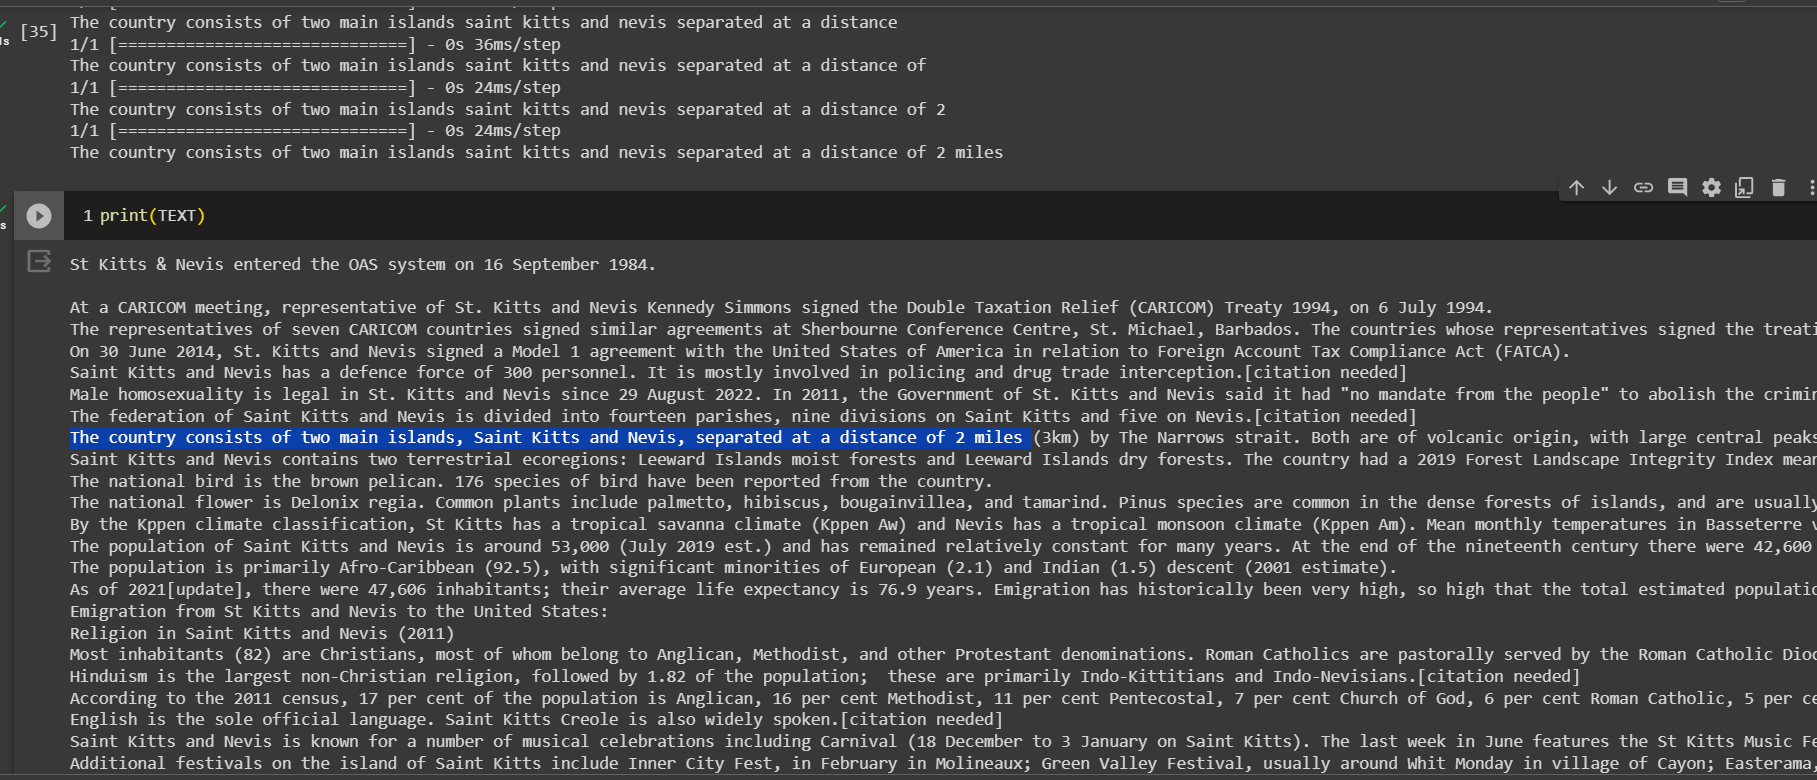

#Converting the ipynb file into HTML file

In [ ]:
%%shell
jupyter nbconvert --to html "/content/0328_Saint_Kitts_and_Nevis.ipynb"

[NbConvertApp] Converting notebook /content/0328_Saint_Kitts_and_Nevis.ipynb to html
[NbConvertApp] Writing 1021860 bytes to /content/0328_Saint_Kitts_and_Nevis.html
